#EECS 504 PS1: Filtering

Please provide the following information 
(e.g. Andrew Owens, ahowens):

Elsa Mary Mathew, elmathew




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).

If you'd like to preview what your notebook will look like when we grade it, follow the directions [here](https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html) for converting the .ipynb notebook into an HTML file. We'll be running a command similar to: 
```
ipython nbconvert --to html ps1.ipynb  
```




# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [0]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs504/w20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

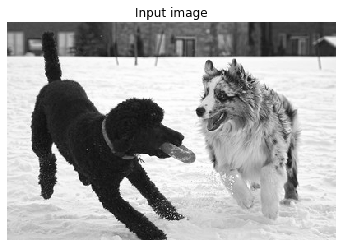

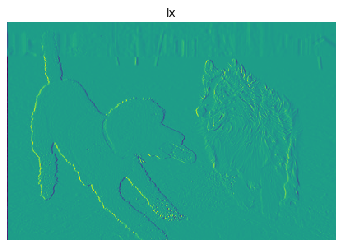

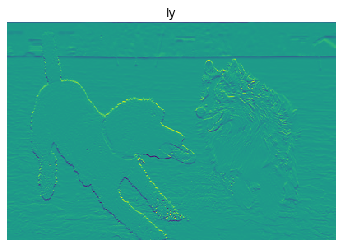

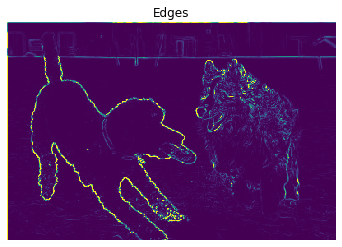

In [2]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

# Your code here!
dx=[[-1,1]]
dy=[[dx[j][i] for j in range(len(dx))] for i in range(len(dx[0]))] 
# the above line of code transposes dx to give dy same as dy=[[-1],[1]]

def convolve (im,h):
  #m=len(im)  #no of rows
  #n=len(im[0]) #no of columns
  #A(m,n)∗B(i−m,j−n)
  C=np.zeros([len(im),len(im[0])])

  for m in range(len(im)):
        for n in range(len(im[0])):
            summing=0
            for i in range(len(h)):
              for j in range(len(h[0])):
                if m-i<0 or n-j<0:
                    summing=summing+(h[i][j]*0)
                else:
                    summing=summing+(h[i][j]*im[m-i][n-j])
            C[m][n]=summing   
  return C             

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2 + Iy**2

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00

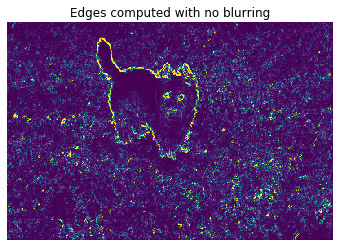

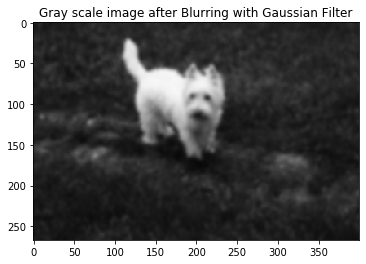

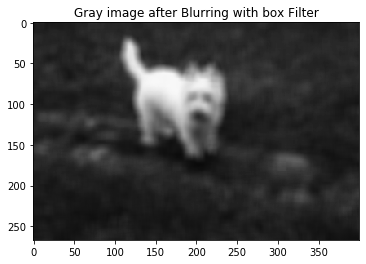

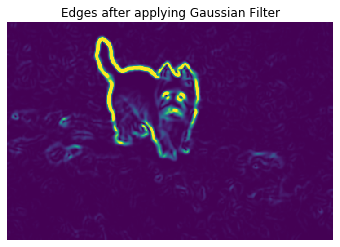

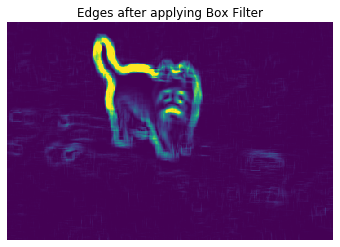

In [11]:

from scipy.ndimage import convolve,gaussian_filter

im = imageio.imread('dog-2.jpg').mean(2)/255.

Ix=scipy.ndimage.convolve(im,[[-1,1]]) # convolution with horizontal gradient
Iy=scipy.ndimage.convolve(im,[[-1],[1]]) # convolution with vertical gradient

#Part(i)
edges=Ix**2+Iy**2
plt.figure()
plt.title('Edges computed with no blurring')
plt.axis('off')
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


#Part(ii)
# 11x11 filter with sigma=2

import math
w=11
x=list(map(int,np.zeros(w))) #broadcasting int to every element of np.zeros
m=0
i=int(w/2)
while i>=0:
  x[m]=i
  i=i-1
  m=m+1
i=1
while m<w:
  x[m]=i
  i=i+1
  m=m+1


std_d=2
var=std_d**2
coeff=1/(2*math.pi*var)
G=np.zeros([11,11])
y=int(w/2)
for i in range(int(w/2)+1):
  for j in range(w):
      G[i][j]=coeff*math.exp(-(x[j]**2+y**2)/(2*var))
  y=y-1

i=0
while i<=4:
  x=10-i
  G[x][:]=G[i][:]
  i=i+1

Gfilter=scipy.ndimage.convolve(im,G) #convolving with Gaussian Filter
plt.figure()
plt.title('Gray scale image after Blurring with Gaussian Filter')
plt.imshow(Gfilter,cmap = 'gray', vmin = 0, vmax = 1)


#Part(iii)
box=1/((11**2)*np.ones([11,11]))
Part3=scipy.ndimage.convolve(im,box)
plt.figure()
plt.title('Gray image after Blurring with box Filter')
plt.imshow(Part3,cmap = 'gray', vmin = 0, vmax = 1)

#Part(iv)-Edges after blurring with Gaussian Filter
Ix=scipy.ndimage.convolve(Gfilter,[[-1,1]]) # convolved with horizontal gradient
Iy=scipy.ndimage.convolve(Gfilter,[[-1],[1]]) # convolved with vertical gradient
edges=Ix**2+Iy**2
plt.figure()
plt.title("Edges after applying Gaussian Filter")
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))
 
#Part(iv)-Edges after blurring with box filter
Ix=scipy.ndimage.convolve(Part3,[[-1,1]]) # convolved with horizontal gradient
Iy=scipy.ndimage.convolve(Part3,[[-1],[1]]) # convolved with vertical gradient
edges=Ix**2+Iy**2
plt.figure()
plt.title("Edges after applying Box Filter")
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


 #Part (v)(Optional) Do you see artifacts in the box-filtered result? Describe how the two results
#differ. Include your written response in the notebook.

#In the image where the box filter has been applied small boxes of the kernel size 11x11 can be observed throughout the image,
#which results in the blurring effect observed in the image.Compared to the box filtered image, the image which is filtered 
#with the gaussian kernel is much clearer
 


# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

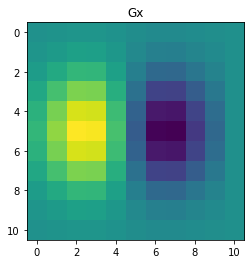

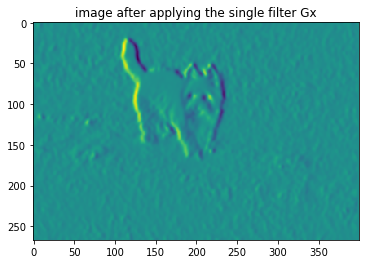

In [4]:
# Your code here!
# Your code here!
from scipy.ndimage import convolve,gaussian_filter
Gx=scipy.ndimage.convolve(G,[[1,-1]])
ii=scipy.ndimage.convolve(im,Gx)

plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('image after applying the single filter Gx')
plt.imshow(ii)


# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

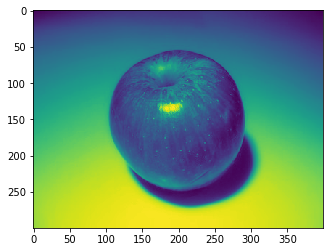

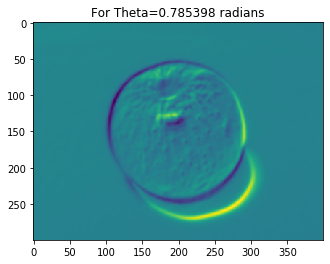

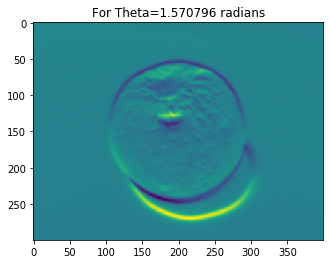

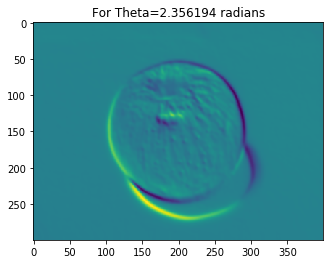

In [5]:
im = imageio.imread('apple.jpg').mean(2)/255.

plt.imshow(im)

# Your code here!
def oriented_grad(Ix,Iy,theta):
   return math.cos(theta)*Ix+math.sin(theta)*Iy

dx=[[1,-1]]
dy=[[dx[j][i] for j in range(len(dx))] for i in range(len(dx[0]))] 
Gfilter=scipy.ndimage.convolve(im,G)
Ix=scipy.ndimage.convolve(Gfilter,[[1,-1]]) # convolved with horizontal gradient
Iy=scipy.ndimage.convolve(Gfilter,[[1],[-1]]) # convolved with vertical gradient
X=[math.pi/4,math.pi/2,math.pi*3/4]

for i in range(len(X)):
  Z=oriented_grad(Ix,Iy,X[i])
  plt.figure()
  plt.title("For Theta=%f radians" % (X[i]))
  plt.imshow(Z)

In [4]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!jupyter nbconvert --to html '/content/gdrive/My Drive/Colab Notebooks/elmathew_71827909.ipynb'

Mounted at /content/gdrive
[NbConvertApp] Converting notebook /content/gdrive/My Drive/Colab Notebooks/elmathew_71827909.ipynb to html
[NbConvertApp] Writing 1690507 bytes to /content/gdrive/My Drive/Colab Notebooks/elmathew_71827909.html
